<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd


In [3]:
data = "/content/drive/MyDrive/flowers/flowers"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['rose', 'sunflower', 'tulip', 'daisy', 'dandelion']


In [4]:
image_names = []
labels = []
data_images = []


size = 320,240

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [5]:
len(labels)

4323

In [6]:
len(data_images)

4323

In [7]:
label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)

In [8]:
pd.unique(labels)

array([2, 3, 4, 0, 1])

In [9]:
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [10]:
len(image_names)

4323

In [11]:
len(labels)

4323

In [12]:
print(f"Shape of images is :{data.shape}")
print(f"Shape of labels is :{labels.shape}")


Shape of images is :(4323, 240, 320, 3)
Shape of labels is :(4323,)


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [14]:
print(f"Shape of training data is:{X_train.shape}\nShape of testing data is :{X_test.shape}")

Shape of training data is:(2593, 240, 320, 3)
Shape of testing data is :(1730, 240, 320, 3)


In [15]:
print(f"Shape of training labels is:{y_train.shape}\nShape of testing labels is :{y_test.shape}")

Shape of training labels is:(2593,)
Shape of testing labels is :(1730,)


In [16]:
# Check first image of Training data
X_train[0]

array([[[0.16078432, 0.48235294, 0.4509804 ],
        [0.12941177, 0.36078432, 0.32156864],
        [0.42352942, 0.49019608, 0.41960785],
        ...,
        [0.16078432, 0.2509804 , 0.24313726],
        [0.13725491, 0.23137255, 0.22352941],
        [0.13333334, 0.23137255, 0.23137255]],

       [[0.29803923, 0.4862745 , 0.41568628],
        [0.19215687, 0.5254902 , 0.44705883],
        [0.31764707, 0.6666667 , 0.654902  ],
        ...,
        [0.17254902, 0.2509804 , 0.24705882],
        [0.1882353 , 0.28235295, 0.27450982],
        [0.16078432, 0.2509804 , 0.2509804 ]],

       [[0.22352941, 0.5176471 , 0.47058824],
        [0.16078432, 0.4392157 , 0.33333334],
        [0.31764707, 0.5803922 , 0.52156866],
        ...,
        [0.13333334, 0.21960784, 0.21960784],
        [0.12941177, 0.22352941, 0.22352941],
        [0.20784314, 0.27450982, 0.27058825]],

       ...,

       [[0.16470589, 0.49411765, 0.34117648],
        [0.02352941, 0.47058824, 0.28627452],
        [0.03529412, 0

In [17]:
#check first labels of training image
y_train[0]

4.0

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

network =Sequential()
network.add(Conv2D(10, (2,2),input_shape=(240, 320, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(12, (2,2),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(5,activation='softmax'))


In [19]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 239, 319, 10)      130       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 12)      492       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55932)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7159424   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [20]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
batch_size = 128
epochs = 14
history=network.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val, y_val))

Epoch 1/14
21/21 [==============================] - 38s 245ms/step - loss: 4.9674 - accuracy: 0.2232 - val_loss: 1.6393 - val_accuracy: 0.2850
Epoch 2/14
21/21 [==============================] - 3s 128ms/step - loss: 1.5501 - accuracy: 0.3202 - val_loss: 1.3883 - val_accuracy: 0.3740
Epoch 3/14
21/21 [==============================] - 2s 119ms/step - loss: 1.3602 - accuracy: 0.4003 - val_loss: 1.1131 - val_accuracy: 0.5370
Epoch 4/14
21/21 [==============================] - 2s 119ms/step - loss: 1.0925 - accuracy: 0.5435 - val_loss: 0.9401 - val_accuracy: 0.6430
Epoch 5/14
21/21 [==============================] - 3s 121ms/step - loss: 0.9289 - accuracy: 0.6410 - val_loss: 0.8127 - val_accuracy: 0.7280
Epoch 6/14
21/21 [==============================] - 3s 122ms/step - loss: 0.7735 - accuracy: 0.7414 - val_loss: 0.6567 - val_accuracy: 0.7930
Epoch 7/14
21/21 [==============================] - 3s 123ms/step - loss: 0.6662 - accuracy: 0.7814 - val_loss: 0.5587 - val_accuracy: 0.8380
Epoch

In [23]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss', u'val_accuracy', u'val_loss']

['accuracy', 'loss', 'val_accuracy', 'val_loss']

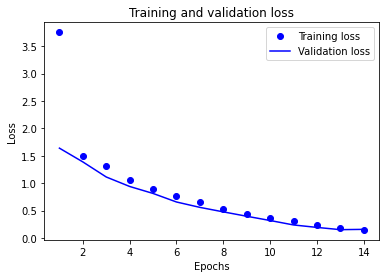

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 1s 20ms/step - loss: 1.3566 - accuracy: 0.5416


[1.356563687324524, 0.5416185259819031]

In [26]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 1.0
1 ==> 3.0
4 ==> 0.0
4 ==> 4.0
4 ==> 4.0
0 ==> 0.0
4 ==> 4.0
1 ==> 1.0
2 ==> 4.0
1 ==> 4.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


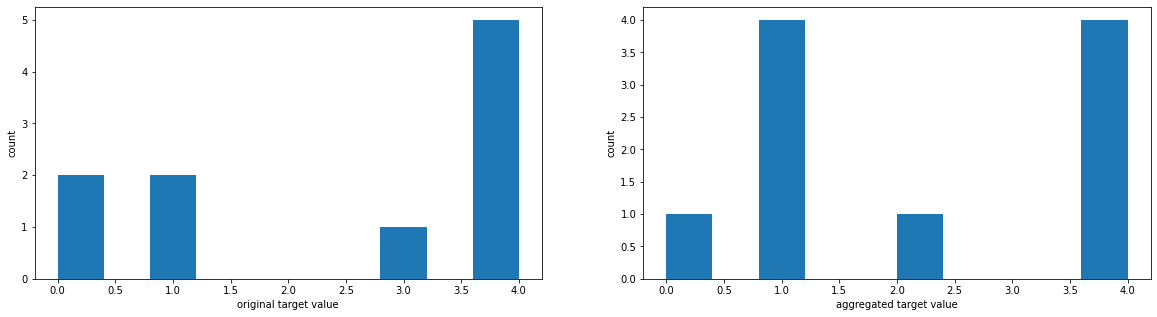

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()